In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy  
from scipy import stats  

In [2]:
# Load data

data = pd.read_csv("Diet_R.csv  ")
data.head(10)   

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
5,4,0,33,171,64,1,61.1
6,5,0,50,170,65,1,62.2
7,6,0,50,201,66,1,64.0
8,7,0,37,174,67,1,65.0
9,8,0,28,176,69,1,60.5


In [3]:
# Index 25, 26 thiếu dữ liệu -> add value

t = data.set_index('Person')
t.loc[[25, 26], 'gender'] = '1'
data_new = t.sort_index()
data_new.head(10)

,gender,Age,Height,pre.weight,Diet,weight6weeks
Person,,,,,,
1,0,22,159,58,1,54.2
2,0,46,192,60,1,54.0
3,0,55,170,64,1,63.3
4,0,33,171,64,1,61.1
5,0,50,170,65,1,62.2
6,0,50,201,66,1,64.0
7,0,37,174,67,1,65.0
8,0,28,176,69,1,60.5
9,0,28,165,70,1,68.1


## Task 1: Ignore diet and test to see if weight has been lost

## Phát biểu giả thiết

$H_0: \mu_0 = \mu_1$. Cân nặng trung bình của trước và sau khi giảm cân là như nhau 

$H_1: \mu_0 \neq \mu_1$. Cân nặng trung bình của trước và sau khi giảm cân khác nhau


In [4]:
pre_w = data_new['pre.weight']
aft_w = data_new['weight6weeks']

In [9]:
std1, p1 = scipy.stats.ttest_ind(pre_w, aft_w)
print(std1, p1)
print("-"*50)
alpha = 0.05
if p1 < alpha:
    print('Có đủ bằng chứng để bác bỏ giả thuyết H0. Điều này ngụ ý rằng cân nặng trước và sau khi giảm cân là có sự khác biệt.')
else:
    print('Không đủ bằng chứng để bác bỏ giả thiết H0. Điều này ngụ ý rằng cân nặng trước và sau khi giảm cân không có sự khác biệt')

2.720972750635475 0.0072584136689251115
--------------------------------------------------
Có đủ bằng chứng để bác bỏ giả thuyết H0. Điều này ngụ ý rằng cân nặng trước và sau khi giảm cân là có sự khác biệt.


Text(0.5, 1.0, 'Weight before and after diet')

<Figure size 432x576 with 0 Axes>

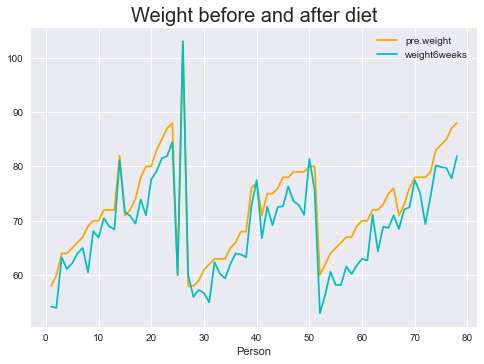

In [10]:
# Biểu đồ cân nặng trước và sau khi giảm cân

plt.figure(figsize=(6, 8))
plt.style.use('seaborn')
data_new[['pre.weight', 'weight6weeks']].plot(color= ['orange', 'c'])
plt.title('Weight before and after diet', fontsize=20)

## Task 2: Remove weight lost and get students to calculate it using before/after weights

In [11]:
# Chỉ số cân nặng đã được giảm decrease_weight 

dec_w = pre_w - aft_w
dec_w

Person
1     3.8
2     6.0
3     0.7
4     2.9
5     2.8
     ... 
74    2.8
75    4.1
76    5.3
77    9.2
78    6.1
Length: 78, dtype: float64

In [12]:
pop = data_new.pop('pre.weight')
data_new.insert(4, "pre.weight", pop)
data_new.insert(6, 'dec_weight', dec_w) 
data_new

,gender,Age,Height,Diet,pre.weight,weight6weeks,dec_weight
Person,,,,,,,
1,0,22,159,1,58,54.2,3.8
2,0,46,192,1,60,54.0,6.0
3,0,55,170,1,64,63.3,0.7
4,0,33,171,1,64,61.1,2.9
5,0,50,170,1,65,62.2,2.8
...,...,...,...,...,...,...,...
74,1,35,183,3,83,80.2,2.8
75,1,49,177,3,84,79.9,4.1
76,1,28,164,3,85,79.7,5.3


## Task 3: Summary statistics by diet

## Task 4: 

### 4.1: Which diet was best for losing weight?

Xây dựng giả thiết:

- $H_0: \mu_1 = \mu_2 = \mu_3$

- $H_1: \mu_i \neq \mu_j$ (i $\neq$ j ,  i, j $\in \overline{1,3}$)

In [13]:
# Lấy slice data gồm "Diet" và "dec_weight" để phân tích 

data4 = data_new[['Diet', 'dec_weight']]
data4

,Diet,dec_weight
Person,,
1,1,3.8
2,1,6.0
3,1,0.7
4,1,2.9
5,1,2.8
...,...,...
74,3,2.8
75,3,4.1
76,3,5.3


In [14]:
# Lấy index đã phân loại

diet = data4.groupby('Diet').groups

In [15]:
# Lấy giá trị tương ứng ở cột des_weight 

type_1 = dec_w[diet[1]]
type_2 = dec_w[diet[2]]
type_3 = dec_w[diet[3]]

## Kiểm tra mỗi nhóm có thuộc phân phối chuẩn chưa

### Sử dụng Shapiro-Wilk test 

Phát biểu giả thiết:

$H_0$: Phân phối của feature là chuẩn

$H_1$: Phân phối của feature là không chuẩn

In [28]:
# Kiểm tra Type_1

stat_type_1, p_type_1 = shapiro(type_1)
print('stat=%.3f, p=%.3f' % (stat_type_1, p_type_1))
if p_type_1 > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')
    

stat=0.926, p=0.077
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp


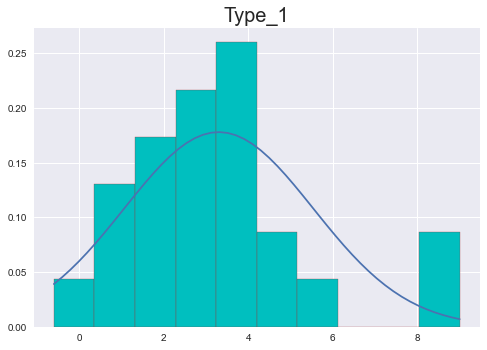

In [23]:
mean = np.mean(type_1)
# ddof=1 :: hiệu chỉnh
std = np.std(type_1, ddof=1)
domain = np.linspace(np.min(type_1), np.max(type_1))
plt.plot(domain, stats.norm.pdf(domain, mean, std))
#density=True :: chuẩn hóa dữ liệu về normal
plt.hist(type_1, color='c', edgecolor='brown', density=True)
plt.title("Type_1", fontsize=20)
plt.show()

In [30]:
# Kiểm tra Type_2

stat_type_2, p_type_2 = shapiro(type_2)
print('stat=%.3f, p=%.3f' % (stat_type_2, p_type_2))
if p_type_2 > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')
   

stat=0.986, p=0.961
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp


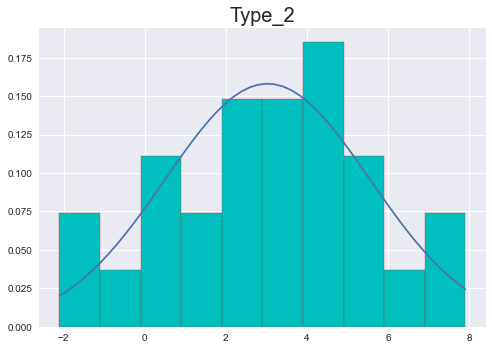

In [24]:
mean = np.mean(type_2)
# ddof=1 :: hiệu chỉnh
std = np.std(type_2, ddof=1)
domain = np.linspace(np.min(type_2), np.max(type_2))
plt.plot(domain, stats.norm.pdf(domain, mean, std))
#density=True :: chuẩn hóa dữ liệu về normal
plt.hist(type_2, color='c', edgecolor='brown', density=True)
plt.title("Type_2", fontsize=20)
plt.show()

In [29]:
# Kiểm tra Type_3

stat_type_3, p_type_3 = shapiro(type_3)
print('stat=%.3f, p=%.3f' % (stat_type_3, p_type_3))
if p_type_3 > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')


stat=0.960, p=0.372
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp


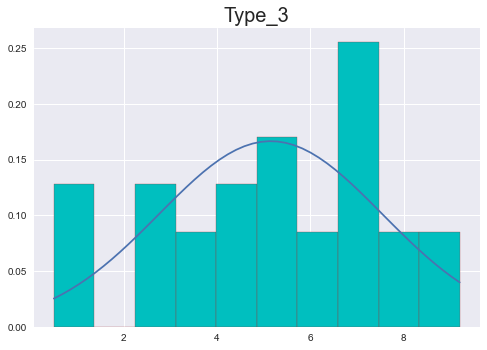

In [25]:
mean = np.mean(type_3)
# ddof=1 :: hiệu chỉnh
std = np.std(type_3, ddof=1)
domain = np.linspace(np.min(type_3), np.max(type_3))
plt.plot(domain, stats.norm.pdf(domain, mean, std))
#density=True :: chuẩn hóa dữ liệu về normal
plt.hist(type_3, color='c', edgecolor='brown', density=True)
plt.title("Type_3", fontsize=20)
plt.show()

## Kiểm định tính thuần nhất phương sai (homogeneity of variance)

### Bartlett’s Test

Phát biểu các giả thiết:


$H_0$: Các feature đều có phương sai đồng nhất 

$H_1$: Có ít nhất 2 feature có phương sai khác nhau (lớn)

Chú ý: Nếu p < 0.05 = $\alpha$ thì loại giả thiết $H_0$. Tức là các feature không đồng nhất về phương sai.

In [31]:
from scipy.stats import bartlett
stat_bartlett, p_bartlett = bartlett(type_1, type_2, type_3)
print(stat_bartlett, p_bartlett)
if p_bartlett > 0.05:
    print('Không thể bác bỏ giả thiết H0. Các feature đồng nhất về phương sai')
    print('Đủ điều kiện đê phân tích ANOVA')
else:
    print('Các feature không đồng nhất về phương sai')

0.337454630479139 0.8447392194944549
Không thể bác bỏ giả thiết H0. Các feature đồng nhất về phương sai
Đủ điều kiện đê phân tích ANOVA


## Phân tích ANOVA

In [13]:
# Tiến hành phân tích ANOVA 1 chiều

from scipy.stats import f_oneway
std2 , p2 = f_oneway(type_1, type_2, type_3)
print('P_value = ',p2)
alpha = 0.05
if (p2 < alpha):
    print('Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp có sự khác biệt')
else:
    print('Không đủ bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp không có sự khác biệt.')

P_value =  0.0032290142385893524
Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp có sự khác biệt


In [14]:
# ANOVA table

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('dec_weight ~ C(Diet)', data=data_new).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Diet),71.093689,2.0,6.197447,0.003229
Residual,430.179259,75.0,NaN,NaN


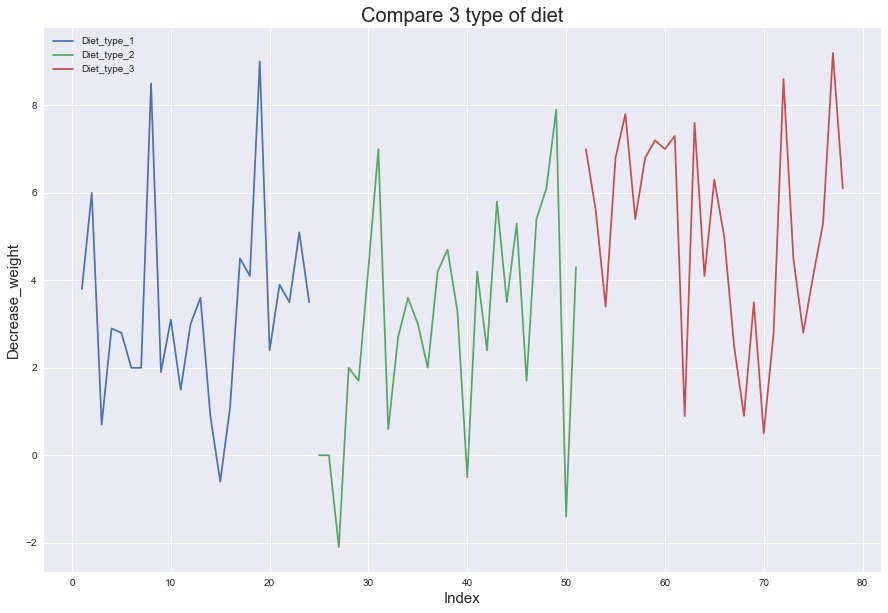

In [44]:
# Biểu đồ thể hiện mức độ hiệu quả của 3 loại ăn kiêng

plt.figure(figsize=(15, 10))
plt.plot(type_1)
plt.plot(type_2)
plt.plot(type_3)
plt.title("Compare 3 type of diet", fontsize=20)
plt.xlabel("Index", fontsize=15)
plt.ylabel("Decrease_weight", fontsize=15)
plt.legend(["Diet_type_1", "Diet_type_2", "Diet_type_3"])

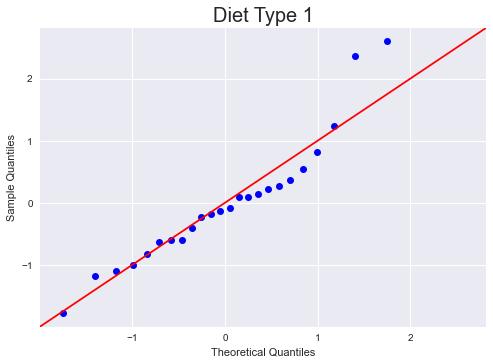

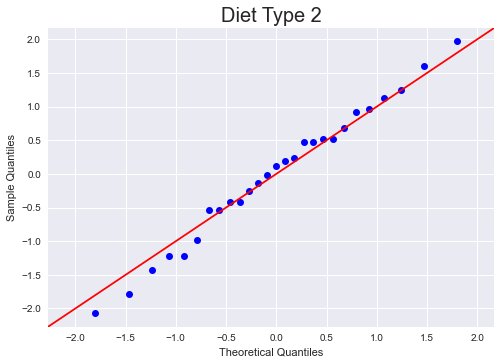

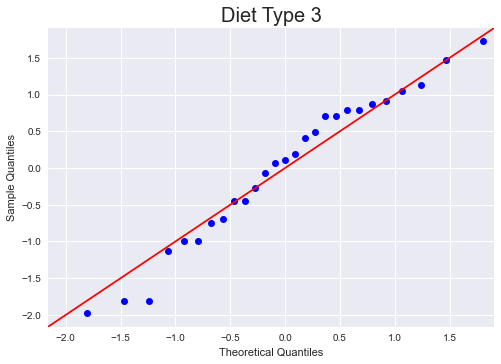

In [21]:
# Đưa dữ liệu về dạng chuẩn tắc 

def standadize(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean)/std

# Biểu đồ thể hiện sự phân tán của dữ liệu của 3 loại ăn kiêng

sm.qqplot(standadize(type_1), line ='45')
plt.title('Diet Type 1', fontsize=20)
sm.qqplot(standadize(type_2), line ='45')
plt.title('Diet Type 2', fontsize=20)
sm.qqplot(standadize(type_3), line ='45')
plt.title('Diet Type 3', fontsize=20)
plt.show()

In [25]:
# Range and Standard deviation of type_1

min1 = type_1.min()
max1 = type_1.max()
print(min1)
print(max1)
print('Range: ',max1-min1)
type_1.std()

-0.5999999999999943
9.0
Range:  9.599999999999994


2.240147510670941

In [26]:
# Range and Standard deviation of type_1

min2 = type_2.min()
max2 = type_2.max()
print(min2)
print(max2)
print('Range: ',max2-min2)
type_2.std()

-2.1000000000000014
7.900000000000006
Range:  10.000000000000007


2.5233665840259754

In [27]:
# Range and Standard deviation of type_1

min3 = type_3.min()
max3 = type_3.max()
print(min3)
print(max3)
print('Range: ',max3-min3)
type_3.std()

0.5
9.200000000000003
Range:  8.700000000000003


2.3955680826781847

In [28]:
Range = [max1-min1, max2-min2, max3-min3]
Std = [type_1.std(), type_2.std(), type_3.std()]
Name = ['1', '2', '3']
table = list(zip(Name, Range, Std))
table = pd.DataFrame(table)
table.columns = ['Type', 'Range', 'Std']
table

,Type,Range,Std
0,1,9.6,2.240148
1,2,10.0,2.523367
2,3,8.7,2.395568


$\Rightarrow$ Loại 2 cho hiệu quả tốt nhất 

### 4.2: Are there gender differences for weight lost?

- Xây dựng giả thuyết 

$H_0:$ Khả năng giảm cân phụ thuộc vào giới tính

$H_0:$ Khả năng giảm cân không phụ thuộc vào giới tính

In [33]:
data42 = data_new[['gender', 'dec_weight']]
data42

,gender,dec_weight
Person,,
1,0,3.8
2,0,6.0
3,0,0.7
4,0,2.9
5,0,2.8
...,...,...
74,1,2.8
75,1,4.1
76,1,5.3


In [34]:
gr42 = data42.groupby('gender').groups
gr42

{'0': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66], '1': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]}

In [35]:
gen0 = dec_w[gr42['0']]
gen1 = dec_w[gr42['1']]

## Kiểm tra mỗi nhóm có thuộc phân phối chuẩn chưa

### Sử dụng Shapiro-Wilk test 

Phát biểu giả thiết:

$H_0$: Phân phối của feature là chuẩn

$H_1$: Phân phối của feature là không chuẩn

In [36]:
# Kiểm tra gen0

stat_gen_0, p_gen_0 = shapiro(gen0)
print('stat=%.3f, p=%.3f' % (stat_gen_0, p_gen_0))
if p_gen_0 > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')
    

stat=0.970, p=0.305
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp


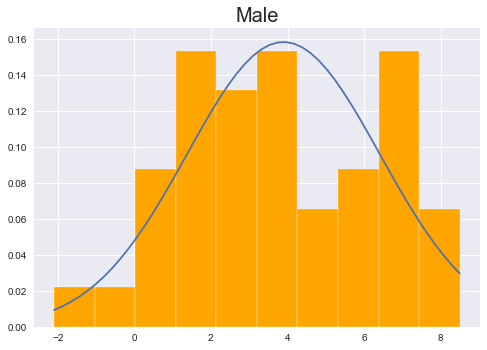

In [47]:
mean = np.mean(gen0)
# ddof=1 :: hiệu chỉnh
std = np.std(gen0, ddof=1)
domain = np.linspace(np.min(gen0), np.max(gen0))
plt.plot(domain, stats.norm.pdf(domain, mean, std))
#density=True :: chuẩn hóa dữ liệu về normal
plt.hist(gen0, color='orange', edgecolor='white', density=True)
plt.title("Male", fontsize=20)
plt.show()

In [48]:
# Kiểm tra gen1

stat_gen_1, p_gen_1 = shapiro(gen1)
print('stat=%.3f, p=%.3f' % (stat_gen_1, p_gen_1))
if p_gen_1 > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')
    

stat=0.975, p=0.600
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp


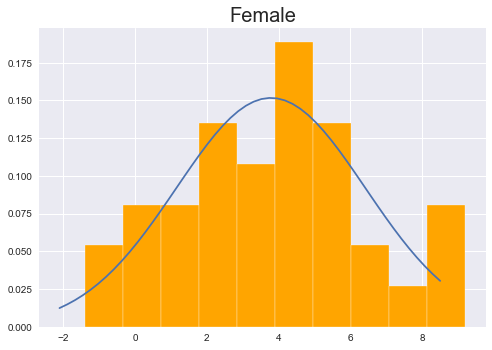

In [49]:
mean = np.mean(gen1)
# ddof=1 :: hiệu chỉnh
std = np.std(gen1, ddof=1)
domain = np.linspace(np.min(gen0), np.max(gen0))
plt.plot(domain, stats.norm.pdf(domain, mean, std))
#density=True :: chuẩn hóa dữ liệu về normal
plt.hist(gen1, color='orange', edgecolor='white', density=True)
plt.title("Female", fontsize=20)
plt.show()

## Kiểm định tính thuần nhất phương sai (homogeneity of variance)

### Bartlett’s Test

Phát biểu các giả thiết:


$H_0$: Các feature đều có phương sai đồng nhất 

$H_1$: Có ít nhất 2 feature có phương sai khác nhau (lớn)

Chú ý: Nếu p < 0.05 = $\alpha$ thì loại giả thiết $H_0$. Tức là các feature không đồng nhất về phương sai.

In [50]:
from scipy.stats import bartlett
stat_bartlett, p_bartlett = bartlett(gen0, gen1)
print(stat_bartlett, p_bartlett)
if p_bartlett > 0.05:
    print('Không thể bác bỏ giả thiết H0. Các feature đồng nhất về phương sai')
    print('Đủ điều kiện đê phân tích ANOVA')
else:
    print('Các feature không đồng nhất về phương sai')

0.073364459569544 0.7864996762413055
Không thể bác bỏ giả thiết H0. Các feature đồng nhất về phương sai
Đủ điều kiện đê phân tích ANOVA


## Phân tích ANOVA

In [33]:
from scipy.stats import f_oneway
std3 , p3 = f_oneway(gen0, gen1)
print('P_value = ',p3)
alpha = 0.05
if (p3 < alpha):
    print('Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp có ảnh hưởng bởi giới tính')
else:
    print('Không đủ bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp không ảnh hưởng bởi giới tính.')

P_value =  0.8548326723539827
Không đủ bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp không ảnh hưởng bởi giới tính.


In [35]:
# ANOVA Table

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('dec_weight ~ C(gender)', data=data_new).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(gender),0.222185,1.0,0.033701,0.854833
Residual,501.050764,76.0,NaN,NaN


## Task 5: Effect of diet and gender on weight lost

- Giả thuyết:

$H_0$: Hiệu quả giảm cân của nam và nữ là như nhau.

$H_1$: Hiệu quả giảm cân của nam và nữ là khác nhau.

In [36]:
# Với mức ý nghĩa 5% thì hiệu quả giảm cân của nam và của nữ có khác nhau không


def results(p, vals=['mean1', 'mean2'], alpha=0.05):
    cols=['score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    if vals: cols = vals + cols
    return df[cols]

from scipy.stats import ttest_1samp

p = {}
p['mean1'] = np.mean(gen0)
p['mean2'] = np.mean(gen1)
p['score'], p['p_value'] = ttest_1samp(gen0, p['mean2'])
results(p)

,mean1,mean2,score,p_value,KetLuan
,3.893023,3.785714,0.279691,0.781088,Chấp nhận H0 với mức ý nghĩa 0.05


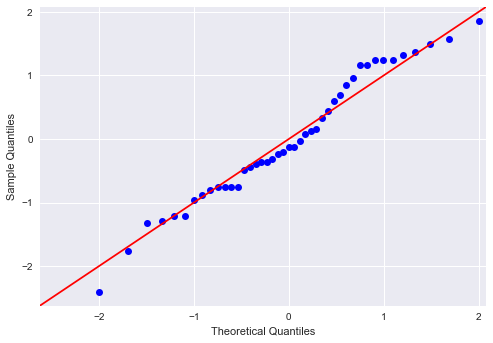

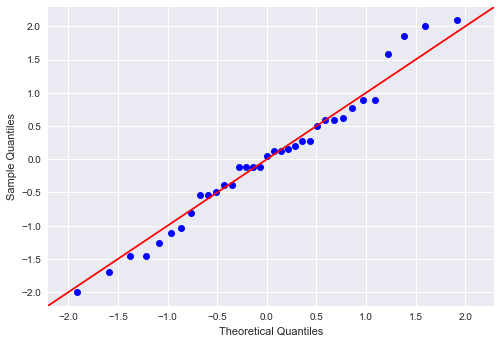

In [73]:
sm.qqplot(standadize(gen0), line ='45')
sm.qqplot(standadize(gen1), line ='45')
plt.show()